Importing packages

In [2]:
import pandas as pd

Reading in the CSVs

In [4]:
full_moon = pd.read_csv("full_moon.csv")
holidays = pd.read_csv("holidays.csv")
weather = pd.read_csv("weather.csv")
crimes = pd.read_csv("Crimes.csv")

Recoding all the date columns to same format

In [5]:
## First, full_moon.csv

### Convert FullMoonDates column to datetime objects
full_moon['FullMoonDates'] = pd.to_datetime(full_moon['FullMoonDates'], format='%d %B %Y')

### Format the dates as 'YYYY-MM-DD' and assign them to a new column
full_moon['use_date'] = full_moon['FullMoonDates'].dt.strftime('%Y-%m-%d')

# Save the updated DataFrame back to the same CSV file, overwriting the original file
full_moon.to_csv("full_moon.csv", index=False)


## Next, holidays.csv

### Date column already in correct format, just want to change the name to use_date for consistency.
holidays.rename(columns={'Date': 'use_date'}, inplace=True)

# Save the updated DataFrame back to the same CSV file, overwriting the original file
holidays.to_csv("holidays.csv", index=False)


## Next, weather.csv

### Same situation as holidays.csv
weather.rename(columns={'datetime': 'use_date'}, inplace=True)

### Save the updated DataFrame back to the same CSV file, overwriting the original file
weather.to_csv("weather.csv", index=False)

ValueError: time data "2005-01-25" doesn't match format "%d %B %Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [6]:
## Now for Crimes.csv

### Convert the 'Date' column to datetime objects
crimes['Date'] = pd.to_datetime(crimes['Date'])

### Create new columns for 'use_date' and 'use_time'
crimes['use_date'] = crimes['Date'].dt.strftime('%Y-%m-%d')
crimes['use_time'] = crimes['Date'].dt.strftime('%H:%M:%S')

### Save the updated DataFrame back to the same CSV file, overwriting the original file
crimes.to_csv("Crimes.csv", index=False)

In [34]:
filtered_crime = crimes[(crimes['Primary Type'] == 'ASSAULT') | (crimes['Primary Type'] == 'BATTERY')]

In [35]:
filtered_crime['violent_crime_count'] = filtered_crime.groupby('use_date')['Case Number'].transform('count')

C:\Users\annab\AppData\Local\Temp\ipykernel_211484\3656211765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crime['violent_crime_count'] = filtered_crime.groupby('use_date')['Case Number'].transform('count')


In [36]:
filtered_crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,use_date,use_time,violent_crime_count
8,13201805,JG413678,2023-09-06 14:45:00,031XX W FILLMORE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,1155404.0,1895201.0,2023,09/14/2023 03:43:09 PM,41.868234,-87.704953,"(41.868234232, -87.704953287)",2023-09-06,14:45:00,14
9,13201684,JG413463,2023-09-06 11:45:00,010XX N PULASKI RD,0460,BATTERY,SIMPLE,CONVENIENCE STORE,False,False,...,1149534.0,1906544.0,2023,09/14/2023 03:43:09 PM,41.899477,-87.726209,"(41.899476558, -87.72620879)",2023-09-06,11:45:00,14
13,13202316,JG414343,2023-09-06 16:00:00,011XX S ST LOUIS AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",ALLEY,False,True,...,1153217.0,1894682.0,2023,09/14/2023 03:43:09 PM,41.866854,-87.712996,"(41.866853689, -87.712996017)",2023-09-06,16:00:00,14
14,13201430,JG413128,2023-09-06 06:00:00,0000X N HAMLIN BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1151064.0,1899854.0,2023,09/14/2023 03:43:09 PM,41.881089,-87.720764,"(41.881088655, -87.720764494)",2023-09-06,06:00:00,14
16,13202353,JG412941,2023-09-06 00:21:00,035XX W FLOURNOY ST,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1152924.0,1896804.0,2023,09/14/2023 03:43:09 PM,41.872682,-87.714015,"(41.872682495, -87.714015459)",2023-09-06,00:21:00,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512174,13056670,JG240884,2023-04-28 16:27:00,040XX W ARTHINGTON ST,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC GROUNDS,False,False,...,1149503.0,1895805.0,2023,08/19/2023 03:40:26 PM,41.870008,-87.726602,"(41.87000817, -87.726601533)",2023-04-28,16:27:00,13
512177,13067345,JG253763,2023-05-09 11:30:00,009XX S INDEPENDENCE BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1151401.0,1895691.0,2023,08/19/2023 03:40:26 PM,41.869658,-87.719636,"(41.869658316, -87.71963634)",2023-05-09,11:30:00,11
512179,13061873,JG247177,2023-05-03 23:12:00,035XX W ADAMS ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,True,True,...,1152863.0,1898846.0,2023,08/19/2023 03:40:26 PM,41.878287,-87.714185,"(41.87828717, -87.714185338)",2023-05-03,23:12:00,10
512182,13044797,JG226598,2023-04-17 08:45:00,027XX W HARRISON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,...,1158295.0,1897254.0,2023,08/19/2023 03:40:26 PM,41.873809,-87.694284,"(41.873809306, -87.694283701)",2023-04-17,08:45:00,10


In [43]:
# Drop duplicates and keep the DataFrame
filtered_crime2 = filtered_crime[['use_date', 'violent_crime_count']]
filtered_crime2.drop_duplicates()

# Merge the two DataFrames on the 'use_date' column
merged_data = pd.merge(filtered_crime2, weather, on='use_date')

print(merged_data)

       use_date  violent_crime_count                   name  tempmax  tempmin  \
0    2023-09-06                   14  Chicago,United States     27.1     20.2   
1    2023-04-12                   10  Chicago,United States     28.3     15.1   
2    2023-08-30                   10  Chicago,United States     21.4     14.5   
3    2023-11-10                   12  Chicago,United States      8.3      2.1   
4    2023-09-07                   16  Chicago,United States     21.7     18.8   
...         ...                  ...                    ...      ...      ...   
5163 2023-06-23                   11  Chicago,United States     28.9     19.9   
5164 2023-08-18                   17  Chicago,United States     25.6     14.9   
5165 2023-08-03                   10  Chicago,United States     31.1     19.4   
5166 2023-05-06                    6  Chicago,United States     25.2     15.3   
5167 2023-05-24                    8  Chicago,United States     20.0     12.3   

      temp  feelslikemax  f

In [44]:
merged_data.to_csv('merged_data.csv')

Inidicating if a day was a full moon or holiday

In [7]:
## Adding a full_moon binary value to weather.csv (since there's a row for each day in that csv)

# Convert 'use_date' column to datetime objects
weather['use_date'] = pd.to_datetime(weather['use_date'])
full_moon['use_date'] = pd.to_datetime(full_moon['use_date'])

# Create a new column 'full_moon' initialized with zeros
weather['full_moon'] = 0

# Set 'full_moon' column to 1 for dates in 'full_moon.csv'
weather.loc[weather['use_date'].isin(full_moon['use_date']), 'full_moon'] = 1

# Save the updated DataFrame back to the same CSV file, overwriting the original file
weather.to_csv("full1.csv", index=False)

In [8]:
## Adding a holiday binary value to weather.csv

# Convert 'use_date' column to datetime objects
weather['use_date'] = pd.to_datetime(weather['use_date'])
holidays['use_date'] = pd.to_datetime(holidays['use_date'])

# Create a new column 'holiday' initialized with zeros
weather['holiday'] = 0

# Set 'holiday' column to 1 for dates in 'holidays.csv'
weather.loc[weather['use_date'].isin(holidays['use_date']), 'holiday'] = 1

# Save the updated DataFrame back to the same CSV file, overwriting the original file
weather.to_csv("full1.csv", index=False)

EDA

In [3]:
# adjusting the columns to match what I was working with in machine learning:
# Load the full dataset from CSV into a pandas DataFrame
full_df = pd.read_csv('merged_data.csv')
full_df['use_date'] = full_df['use_date'].str.replace('-', '').astype(float)
full_df['sunrise'] = pd.to_datetime(full_df['sunrise'])
full_df['sunset'] = pd.to_datetime(full_df['sunset'])
full_df['sunrise_time'] = full_df['sunrise'].dt.hour * 60 + full_df['sunrise'].dt.minute
full_df.drop(columns=['sunrise'], inplace=True)
full_df['sunset_time'] = full_df['sunset'].dt.hour * 60 + full_df['sunset'].dt.minute
full_df.drop(columns=['sunset'], inplace=True)
full_df.dropna(axis=0, inplace=True)

full_df.drop(columns=['name', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'icon', 'preciptype', 'description', 'conditions', 'stations',
                    'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'precipprob', 'preciptype', 'snow', 'dew', 'severerisk', 'winddir', 'windgust', 'solarenergy',
                    'moonphase', 'Unnamed: 0'], inplace=True)

In [5]:
# Compute the correlation matrix
correlation_matrix = full_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                     use_date  violent_crime_count      temp  feelslike  \
use_date             1.000000             0.022245 -0.158658  -0.150784   
violent_crime_count  0.022245             1.000000  0.395914   0.397855   
temp                -0.158658             0.395914  1.000000   0.996819   
feelslike           -0.150784             0.397855  0.996819   1.000000   
humidity             0.260483            -0.094187 -0.170334  -0.154244   
precip              -0.021897             0.089087  0.182049   0.181802   
precipcover          0.047955            -0.001094  0.022853   0.031304   
snowdepth            0.082329            -0.211873 -0.374369  -0.374631   
windspeed           -0.121025            -0.129678 -0.126303  -0.157924   
uvindex             -0.116125             0.118403  0.319554   0.308994   
full_moon           -0.028215            -0.043423  0.013465   0.010802   
holiday             -0.024622            -0.044700 -0.035595  -0.034424   
sunrise_time         0.22

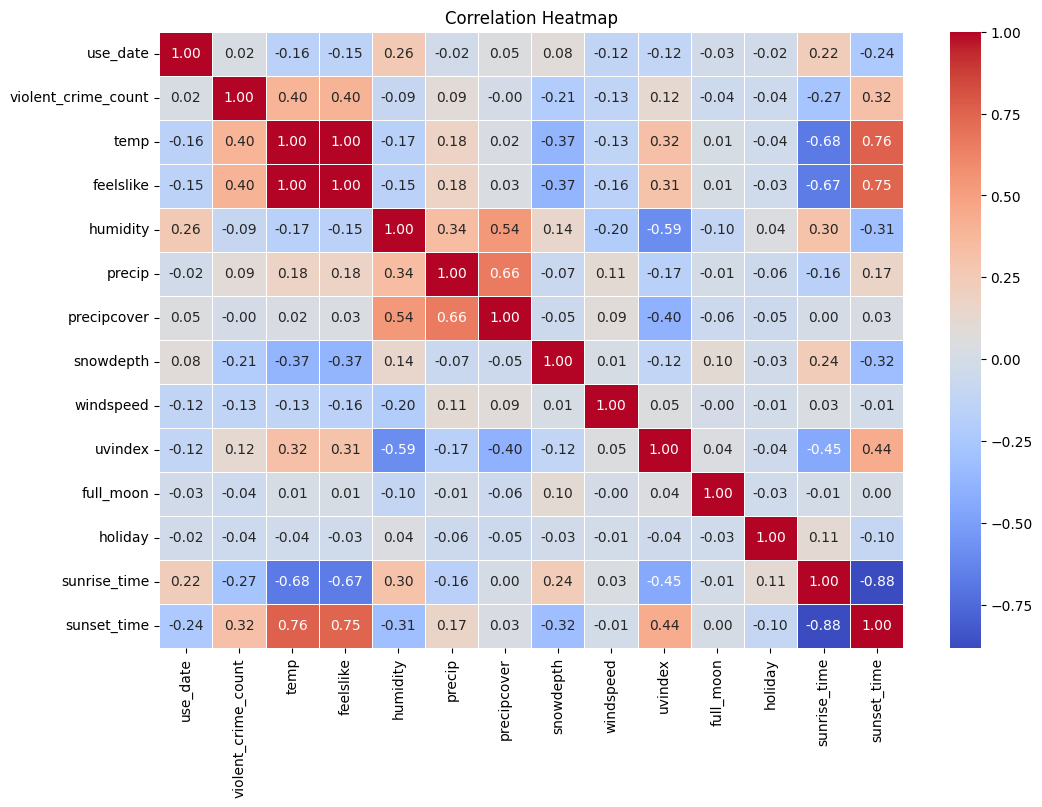

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
